In [2]:
import numpy as np
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter

import astropy.table
from astropy.table import Table, Column, MaskedColumn 
from astropy.visualization import astropy_mpl_style
from scipy.stats import gaussian_kde
import seaborn as sns
import os.path

from time import time
from sklearn import manifold, datasets

import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import product

import obtain_data

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=16, usetex=True)

In [5]:
import importlib
importlib.reload(obtain_data)

apo_rc = obtain_data.apogeedr16_rc()

16193 stars in your APOGEE DR16 sample all


In [6]:
apo_rc.get_umap_tsne_colours(p=80, lr=100, nn=100, md=0.1, metric="euclidean")

In [7]:
# Decide on what to use as input for the dimensionality reduction code:
cn       = True    # only applicable for APOGEE (not enough stars with C/N measured for Bensby & HARPS)
feh      = True    # whether to include Fe/H as a dimension - currently not implemented for APOGEE!
norm     = "stdev" # other possible choices: "hogg2016" or None

# Define some useful names
data     = [apo_rc]
dataname = ["APOGEE DR16 RC"]
idcol    = ["APOGEE_ID"]
tname    = ["apogee_rc"]

Xlist, Xerrlist, Xnormlist = [], [], []

for ii in [0]:
    data[ii].get_ndimspace(cn=cn, norm=norm)
    X, Xerr, Xnorm = data[ii].X, data[ii].Xerr, data[ii].Xnorm
    Xlist.append(X); Xerrlist.append(Xerr); Xnormlist.append(Xnorm)

In [8]:
results = Table.read("../data/dimred_results/apogee_rc_dimred_hyperparametertest.fits")

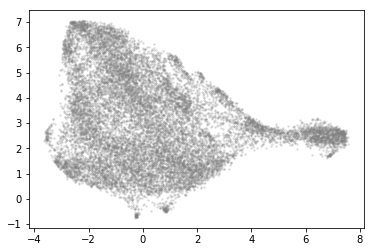

In [9]:
colstring = "umap_euclidean_nn100_md0.1"
scat = plt.scatter(results["X_"+colstring], results["Y_"+colstring], s=5, lw=0, c="grey", alpha=0.3)

data = results["X_"+colstring, "Y_"+colstring].to_pandas().to_numpy()
dataid = results["ID","X_"+colstring, "Y_"+colstring].to_pandas().to_numpy()

In [11]:
importlib.reload(obtain_data)

apo_rc = obtain_data.apogeedr16_rc()
apo_rc.get_umap_tsne_colours(p=80, lr=100, nn=100, md=0.1,)
apo_rc.get_umap_subsets(nn=100, md=0.1, min_samples=15, min_cluster_size=30)
#print(apo_rc.classcol)
#datasubs = results["ID","X_"+colstring, "Y_"+colstring].to_pandas().to_numpy
#datasubs = results["ID"].to_numpy
#print(results["ID"])

16193 stars in your APOGEE DR16 sample all


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


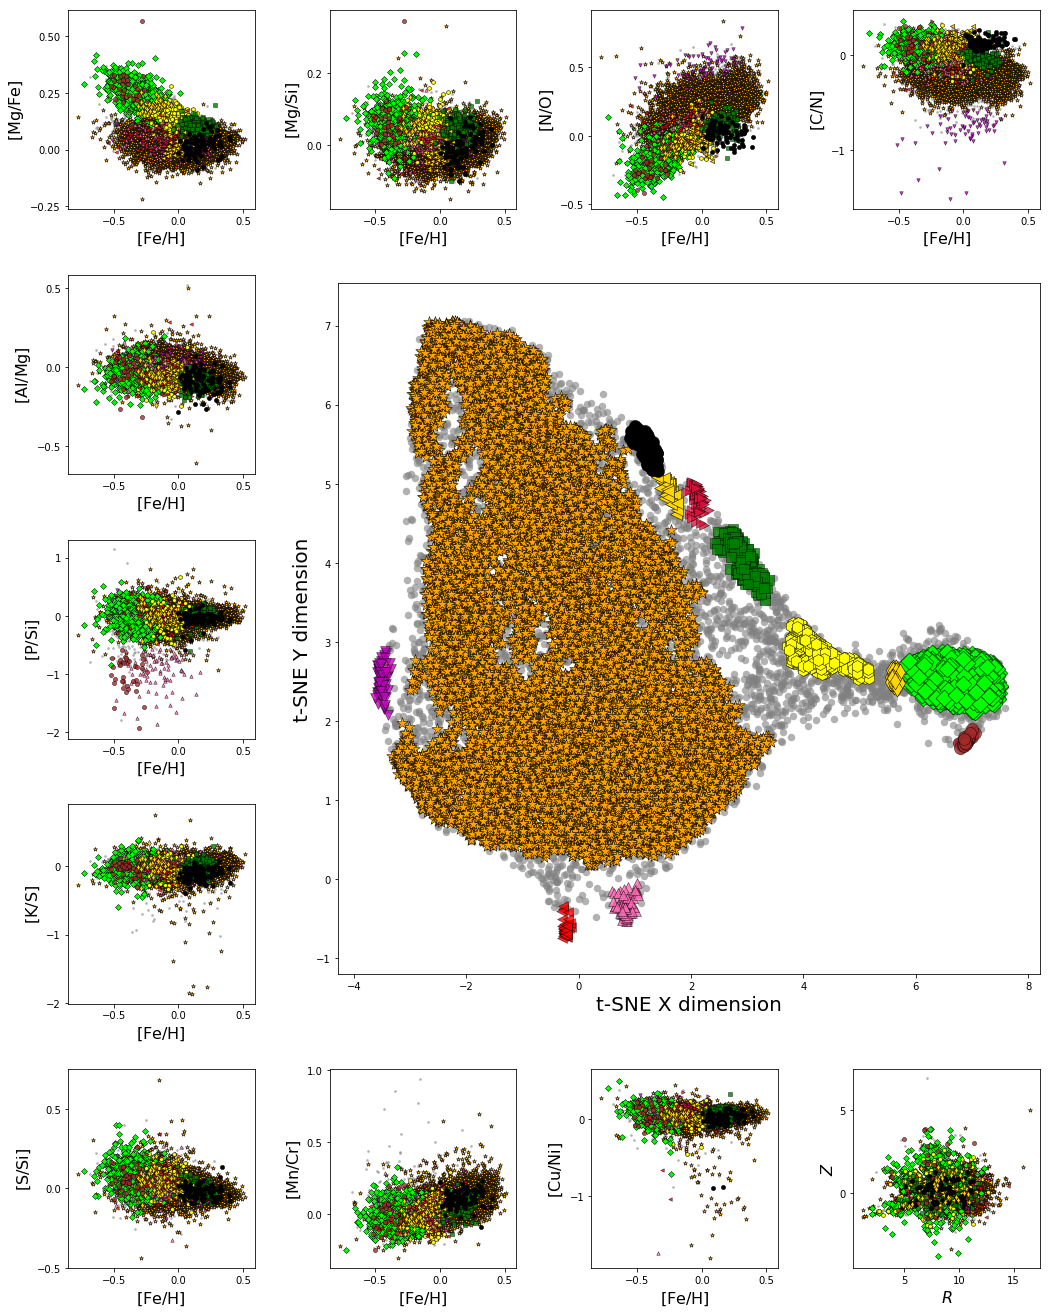

In [15]:
t = apo_rc

# t-SNE + abundances plot

exinds = [ [0,1], [0,2], [0,4], [0,5],
           [0,6], None,  None,  None, 
           [0,7], None,  None,  None, 
           [0,8], None,  None,  None, 
           [0,9],[0,10],[0,11],[13,14] ]
limits = [ None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None ]

order=[0,7,12,10,1,2,3,4,5,6,8,9,11] # I define the order in which the plot is to be made so that the smaller groups may be seen
#------------------------------------------------------------
# Plot the results
import matplotlib.gridspec as gridspec

g   = plt.figure(figsize=(15, 19))

#################
# abundance plots around
#################
gs = gridspec.GridSpec(5, 4)
gs.update(left=0.08, bottom=0.06, right=0.98, top=0.98,
           wspace=0.4, hspace=0.33)

for jj in range(20):
    print(jj)
    if exinds[jj] != None:
        ax = plt.subplot(gs[int(jj/4), int(jj%4)])
        g.add_subplot(ax)
        for kk in order:
            mask = (t.classcol == t.subsets[kk]) #* (xerr[exinds[jj][1]] < 9.9)
            #ax.errorbar(xx[exinds[jj][0]][mask], xx[exinds[jj][1]][mask],
            #            xerr=xerr[exinds[jj][0]][mask], yerr=xerr[exinds[jj][1]][mask],
            #           ms=0, mec="k", capthick=0, elinewidth=1,
            #           mfc=t.col[kk], alpha=t.al[kk]/4., ecolor=t.col[kk], lw=0,
            #           marker=t.sym[kk], zorder=0)
            ax.scatter(t.colors[exinds[jj][0]][mask], t.colors[exinds[jj][1]][mask],
                       s=t.size[kk], lw=t.lw[kk], edgecolors="k",
                       c=t.col[kk], alpha=t.al[kk],
                       marker=t.sym[kk])
        ax.set_xlabel(t.titles[exinds[jj][0]], fontsize=16)
        ax.set_ylabel(t.titles[exinds[jj][1]], fontsize=16)
        if limits[jj] != None:
            ax.axis(limits[jj])
        ax.locator_params(tight=True, nbins=4)

#################
# t-SNE plot in the center
#################
gs0 = gridspec.GridSpec(1, 1)
gs0.update(left=0.33, bottom=0.275, right=0.98, top=0.78)
ax  = plt.Subplot(g, gs0[0, 0])
g.add_subplot(ax)
for kk in order:
    mask = (t.classcol == t.subsets[kk])
    ax.scatter(t.Xu[mask], t.Yu[mask], s=8*t.size[kk], lw=t.lw[kk], edgecolors="k",
               c=t.col[kk], alpha=t.al[kk], marker=t.sym[kk], label=t.names[kk])
    # Annotate population names
    #if kk < len(t.names):
    #    ax.text(t.Xcoords[kk], t.Ycoords[kk], t.names[kk], fontsize=1.25*t.fsize[kk])
ax.set_xlabel("t-SNE X dimension", fontsize=20)
ax.set_ylabel("t-SNE Y dimension", fontsize=20)
"""ax.text(8.1, 2.6, "Thin Disc", fontsize=30)
ax.text(12, 0, "Thick Disc I+II", fontsize=24)
ax.text(-12.8, -9,"Inner Disc I", fontsize=22)
ax.text(-22.2, -6.3, "Inner Disc II", fontsize=22)
ax.text(-23, 6.2, "Inner disc IV", fontsize=22)
ax.text(-23.2, -3, "Inner Disc III", fontsize=18)
ax.text(8, -8.8, "Outer Disc", fontsize=24)
ax.legend(loc='upper right', fontsize=14)"""
#ax.axis([-13, 25, -8, 10.2])

plt.savefig("../im/apogee_rc_big-umap-abundsplot3.png", dpi=200)  


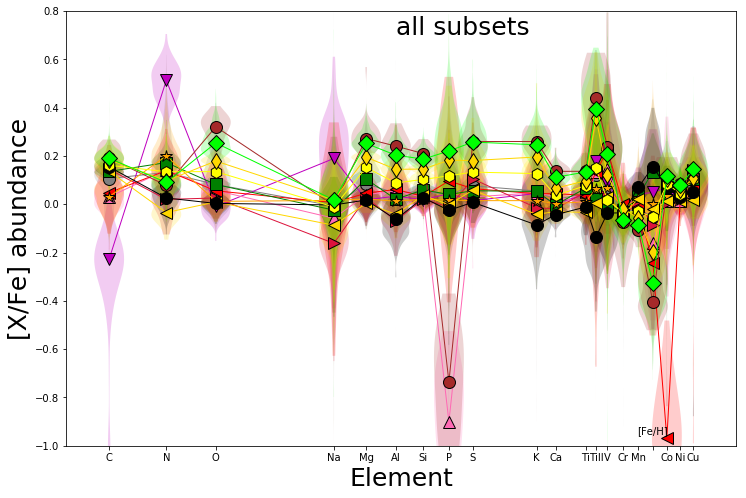

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

t = apo_rc
what = {"thick":[0,1,2,3,4], "thin":[0,5,7,9],
        "strange": [0,10,11,12,13,14,16,17,18,19]}
inds = "strange"
note = {"thick":r"High-$[\alpha$/Fe] populations",
        "thin":r"Low-$[\alpha$/Fe] populations",
        "strange":r"Peculiar stars"}
Z=[ 6, 7, 8, 11, 12, 13, 14, 15, 16, 19, 20, 21.7, 22.3, 23, 24, 25, 26, 27, 28, 29]
#Z=[ 12, 13, 14, 20, 22, 26, 29, 30, 38, 39, 40, 56, 58, 60, 63]
Znames = ["C", "N", "O", "Na", "Mg", "Al","Si", "P", "S", "K", "Ca", "Ti","TiII",
          "V", "Cr", "Mn", "", "Co", "Ni", "Cu"]
abunds = ["C_FE", "N_FE", "O_FE", "NA_FE", "MG_FE", "AL_FE","SI_FE", "P_FE", "S_FE", "K_FE", 
          "CA_FE", "TI_FE","TIII_FE", "V_FE", "CR_FE", "MN_FE", "FE_H", "CO_FE", "NI_FE", "CU_FE"]
Znames2= ["", "", "", "", "", "","", "", "", "", "", "","",
          "", "", "", "[Fe/H]", "", "", ""]


f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(111)
for kk in np.arange(len(t.subsets)):
#    mask = np.where(t.classcol == t.subsets[kk])[0]
    mask = (t.classcol == t.subsets[kk])
#    mask = np.where(t.classcol == t.subsets[kk])[0]
#    print([t.colors[jj][mask]for jj in np.arange(len(Z))])
#    print(np.nanmedian([t.colors[jj][mask]for jj in np.arange(len(Z))],axis=1))
    if kk < 20:
        violins = ax.violinplot([t.data[abunds[jj]][mask] for jj in np.arange(len(Z))],np.log10(Z),
                                t.sym[kk]+'-', widths=0.035, showextrema=False)
        for pc in violins['bodies']:
            pc.set_facecolor(t.col[kk])
            pc.set_alpha(.2)
#            pc.set_alpha(t.al[kk])
        plt.plot(np.log10(Z), np.nanmedian([t.data[abunds[jj]][mask]for jj in np.arange(len(Z))],axis=1), t.sym[kk]+'-',
                 c=t.col[kk], alpha=1, ms=12, lw=1, mec="k")
#    else:
 #       plt.plot(np.log10(Z), [t.colors[jj][mask]for jj in np.arange(len(Z))], t.sym[kk]+'-', c=t.col[kk],
  #               alpha=1, ms=12, lw=1, mec="k")
ax.axis([np.log10(Z[0])-.05, np.log10(Z[-1])+0.05, -1.0, .8])
ax.set_ylabel(r"[X/Fe] abundance",fontsize=25)
ax.text(np.log10(13),.7, 'all subsets', horizontalalignment='left',fontsize=25)

ax.set_xticks(np.log10(Z))
ax.set_xticklabels([]) #str(zz) for zz in Z
for ii in np.arange(len(Znames2)):
    ax.text(np.log10(Z[ii]), -0.95, Znames2[ii], horizontalalignment='center')
ax.set_xlabel(r"Element",fontsize=25)
ax.set_xticklabels(Znames)

plt.savefig("../im/apogee_rc_violin.png", dpi=200)  

In [27]:
for kk in np.arange(len(t.subsets)):
    print(t.subsets[kk], "(", t.col[kk], t.sym[kk], ")")
    print(t.data["APOGEE_ID"][(t.classcol == t.subsets[kk])][:5])
    print("===========================")

-1 ( grey o )
    APOGEE_ID     
------------------
2M00012984+7052497
2M00013900+6246301
2M00041502+5614532
2M00055512+7604271
2M00063177+0138346
0 ( m v )
    APOGEE_ID     
------------------
2M00080548+5844373
2M00344827+5842455
2M01001653+6017239
2M01071251+5853475
2M02190896+4304309
1 ( hotpink ^ )
    APOGEE_ID     
------------------
2M00234507+5636220
2M00251852+5745192
2M00261075+5003004
2M00265506+5545416
2M00293411+5604452
2 ( crimson > )
    APOGEE_ID     
------------------
2M03532831+2453192
2M04585761+3649258
2M05171948+1602576
2M05315821+2545552
2M05432537+1231500
3 ( r < )
    APOGEE_ID     
------------------
2M00290435+5948161
2M00314026+6131271
2M01002614+5921552
2M01334937+5920094
2M01375745+6231166
4 ( g s )
    APOGEE_ID     
------------------
2M00311083+5121384
2M01231350+5710042
2M02060818+5433144
2M02544750+4427088
2M02545586+5239415
5 ( brown o )
    APOGEE_ID     
------------------
2M05004113-7132123
2M05165191-7344409
2M07573675+4513262
2M10205585+015422

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


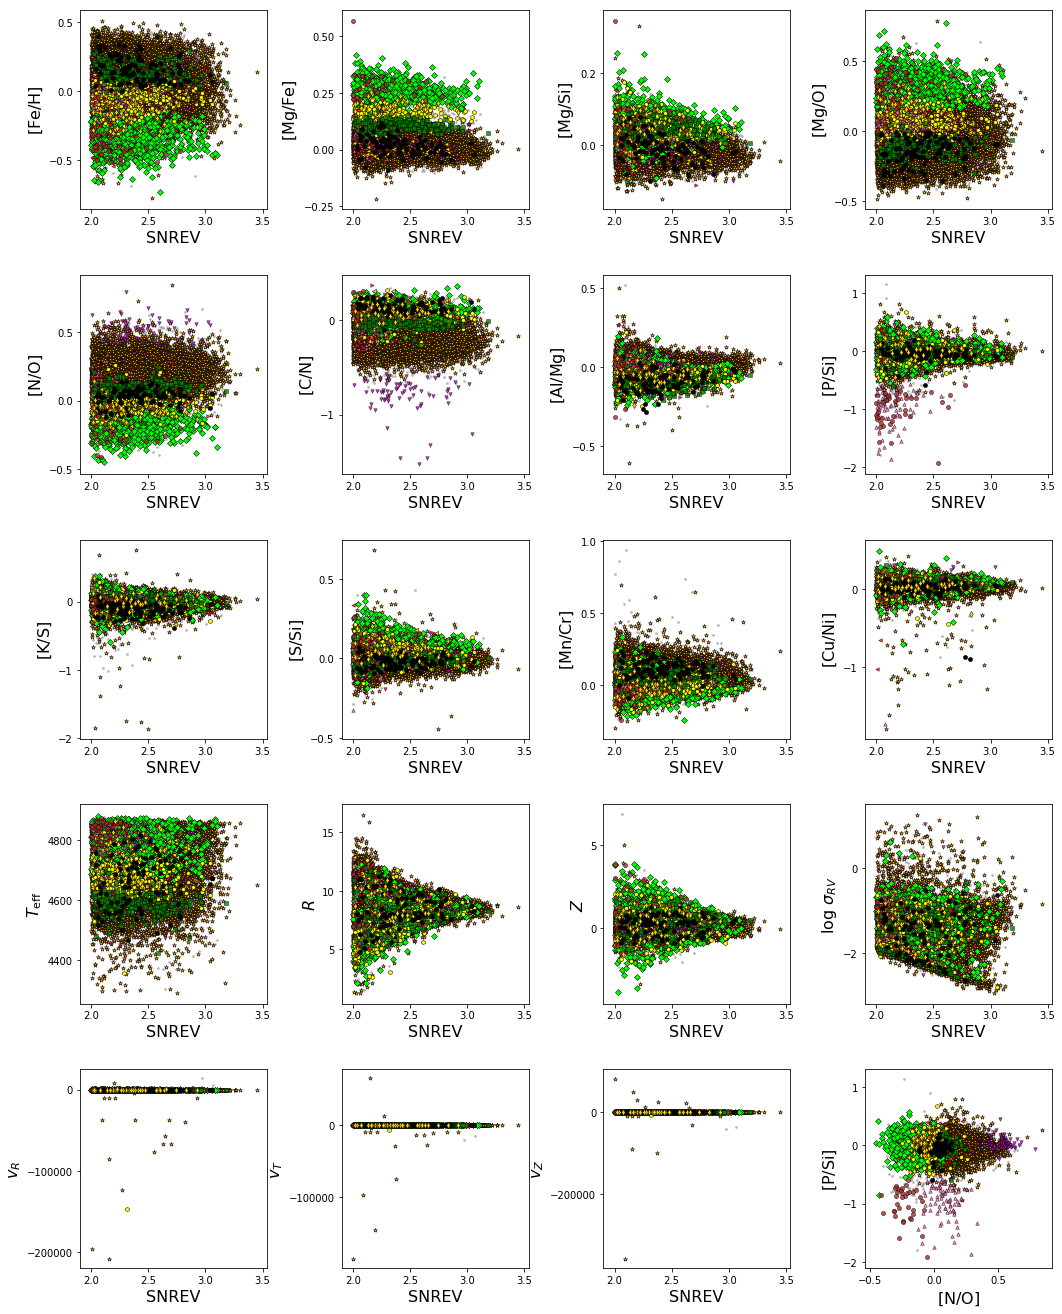

In [13]:
t = apo_rc

# t-SNE + abundances plot

exinds = [ [16,0], [16,1], [16,2], [16,3],
           [16,4], [16,5], [16,6], [16,7],
           [16,8], [16,9], [16,10], [16,11], 
           [16,12], [16,13], [16,14], [16,15],
           [16,17],[16,18],[16,19],[4,7] ]
limits = [ None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None, 
           None,  None,  None,  None ]

order=[0,7,12,10,1,2,3,4,5,6,8,9,11] # I define the order in which the plot is to be made so that the smaller groups may be seen

#------------------------------------------------------------
# Plot the results
import matplotlib.gridspec as gridspec

g   = plt.figure(figsize=(15, 19))

#################
# abundance plots around
#################
gs = gridspec.GridSpec(5, 4)
gs.update(left=0.08, bottom=0.06, right=0.98, top=0.98,
           wspace=0.4, hspace=0.33)

for jj in range(20):
    print(jj)
    if exinds[jj] != None:
        ax = plt.subplot(gs[int(jj/4), int(jj%4)])
        g.add_subplot(ax)
        for kk in order:
            mask = (t.classcol == t.subsets[kk]) #* (xerr[exinds[jj][1]] < 9.9)
            #ax.errorbar(xx[exinds[jj][0]][mask], xx[exinds[jj][1]][mask],
            #            xerr=xerr[exinds[jj][0]][mask], yerr=xerr[exinds[jj][1]][mask],
            #           ms=0, mec="k", capthick=0, elinewidth=1,
            #           mfc=t.col[kk], alpha=t.al[kk]/4., ecolor=t.col[kk], lw=0,
            #           marker=t.sym[kk], zorder=0)
            ax.scatter(t.colors[exinds[jj][0]][mask], t.colors[exinds[jj][1]][mask],
                       s=t.size[kk], lw=t.lw[kk], edgecolors="k",
                       c=t.col[kk], alpha=t.al[kk],
                       marker=t.sym[kk])
        ax.set_xlabel(t.titles[exinds[jj][0]], fontsize=16)
        ax.set_ylabel(t.titles[exinds[jj][1]], fontsize=16)
        if limits[jj] != None:
            ax.axis(limits[jj])
        ax.locator_params(tight=True, nbins=4)


plt.savefig("../im/apogee_rc_big-umap-abundsplot2.png", dpi=200)  
